In [1]:
from zs6d import ZS6D
import os
import json


# Loading the config file:
with open(os.path.join("./zs6d_configs/bop_eval_configs/cfg_ycbv_inference_bop.json"), "r") as f:
    config = json.load(f)
    
# Instantiating the pose estimator:
# This involves handing over the path to the templates_gt file and the corresponding object norm_factors.
pose_estimator = ZS6D(config['templates_gt_path'], config['norm_factor_path'])

/home/philipp/anaconda3/envs/zs6d/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using cache found in /home/philipp/.cache/torch/hub/facebookresearch_dino_main
100%|██████████| 21/21 [00:57<00:00,  2.73s/it]


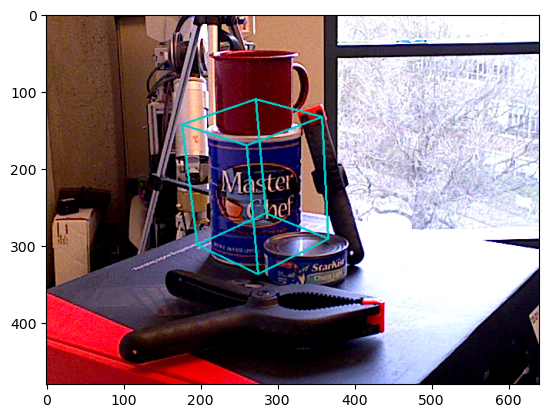

Pose estimation time: 1.5971465110778809
R_est: [[ 0.72543844 -0.68505472 -0.06662655]
 [-0.32835789 -0.25938138 -0.90824138]
 [ 0.60491336  0.68075056 -0.41310835]]
t_est: [-31.84649055 -17.93335877 876.13987084]


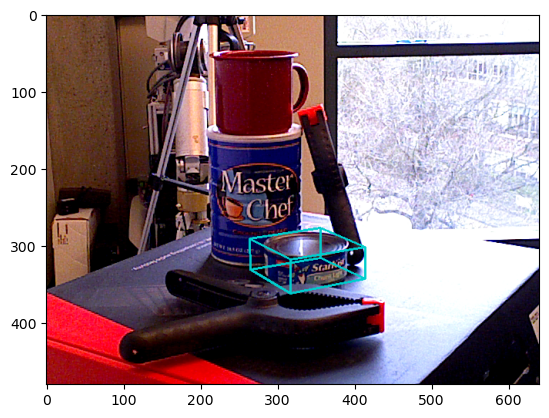

Pose estimation time: 0.47324347496032715
R_est: [[-0.87514462  0.4838035  -0.00748804]
 [ 0.11219674  0.18784853 -0.97576884]
 [-0.47067376 -0.85477898 -0.2186758 ]]
t_est: [ 19.90558582  59.64623651 836.76407136]


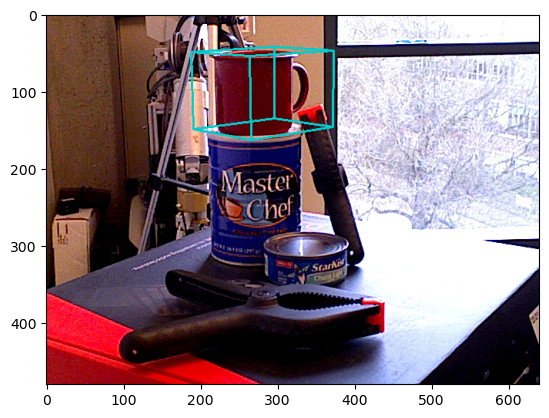

Pose estimation time: 0.49465012550354004
R_est: [[ 0.72814844 -0.68540624 -0.00425974]
 [-0.16799231 -0.17243624 -0.97058968]
 [ 0.66451369  0.70744896 -0.24070216]]
t_est: [ -25.23845884 -116.74292205  873.86374266]


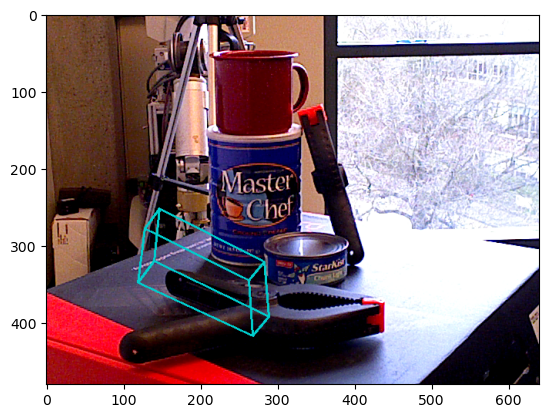

Pose estimation time: 0.40497708320617676
R_est: [[-0.07536022 -0.81916004  0.56859271]
 [-0.53139957 -0.44950568 -0.71802447]
 [ 0.8437626  -0.35626041 -0.40142645]]
t_est: [-109.4153609    95.6700516  1100.44931585]


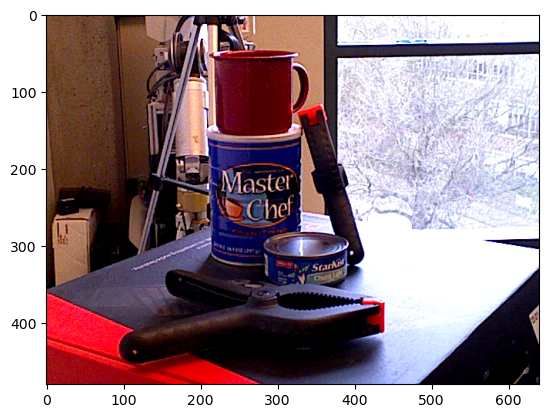

Pose estimation time: 0.4103047847747803
R_est: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
t_est: [8.48798316e-314 6.94387924e-310 1.25986740e-321]


: 

In [2]:
import cv2
from PIL import Image
import pose_utils.img_utils as img_utils
import pose_utils.vis_utils as vis_utils
import numpy as np
import time
import matplotlib.pyplot as plt

# Loading a ground truth file to access segmentation masks to test zs6d:
with open(os.path.join(config['gt_path']), 'r') as f:
    data_gt = json.load(f)

img_id = '000048_1'
# img_id = '8'



for i in range(len(data_gt[img_id])):
    obj_number = i
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    img_path = os.path.join(config['dataset_path'], data_gt[img_id][obj_number]['img_name'].split("./")[-1])
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()
    
    # To estimate the objects Rotation R and translation t the input image, the object_id, a segmentation mask and camera matrix are necessary
    R_est, t_est = pose_estimator.get_pose(img, str(obj_id), mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    plt.imshow(out_img)
    plt.show()
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")


